# Breath of the Wild

In [1]:
# call in dependencies
import requests
import json
import pandas as pd
import os
from pyrule_compendium import compendium
from pprint import pprint
import csv
import matplotlib.pyplot as plt
import csv

In [2]:
comp = compendium()

#pprint(comp.get_all()["equipment"][0]) # get all entries
# print(comp.get_entry("silver lynel")) # get a specific entry with it's name
# pprint(comp.get_entry(380)) #get a specific entry with it's ID
# pprint(comp.get_category("equipment")) # get all entries in a category
# comp.download_entry_image("silver lynel", "dream_pet.png") # download entry image

In [3]:
# create empty list to store item
equip_list = []
equip = {}
materials = []
monsters = []
foods = []
drops = []

In [4]:
# pull category data and assign to a variable, to be used for appending to lists.
equipment_json = comp.get_all()["equipment"]
materials_json = comp.get_all()["materials"]
monsters_json = comp.get_all()["monsters"]
creatures_json = comp.get_all()["creatures"]["food"]

# Get equipment list

In [5]:
# create loop to get equipment data store to list.
for i in equipment_json:
    # create a dictionary for equipment to create DataFrame
    equipment_dict = {
        "name": i['name'],
        "attack": i['attack'],
        "defense": i['defense']
    }
    # add dictionary to list.
    equip_list.append(equipment_dict)

In [6]:
# Create DataFrame and save to .csv file
equipment_df = pd.DataFrame(equip_list).sort_values(by="name")
equipment_df.to_csv("BotW_equip_stats.csv", index=False)

# Get materials and foods list

In [7]:
# get materials and add to list
for i in materials_json:
    # create a dictionary for materials to create DataFrame)
    material_dict = {
        "name": i['name'],
        "hearts_recovered": i['hearts_recovered'],
        "cooking_effect": i['cooking_effect'],
    }
     # add dictionary to list.
    materials.append(material_dict)

In [8]:
# Create DataFrame from dictionary
materials_df = pd.DataFrame(materials)

In [9]:
# add a 'none' to the cooking_effect that show a blank
materials_df["cooking_effect"] = ['none' if x == '' else x for x in materials_df['cooking_effect']]

In [10]:
# Preivew DataFrame
#materials_df

In [11]:
# save to .csv file
materials_df.to_csv("BotW_material_stats.csv", index=False)

In [12]:
# # union materials df and foods df into a new DataFrame
# consumables_df = pd.concat([materials_df, foods_df]).reset_index(drop=True)

In [13]:
# consumables_df = consumables_df.sort_values(by="hearts_recovered", ascending=False)

In [14]:
# # Save consumables to a csv file
# consumables_df.to_csv("BotW_consumables.csv", index=False)

# Let's get cooking!

In [15]:
# get foods and add to list
for i in creatures_json:
    # create a dictionary for foods to create DataFrame)
    food_dict = {
        "name": i['name'],
        "hearts_recovered": i['hearts_recovered'],
        "cooking_effect": i['cooking_effect'],
    }
    # add dictionary to list.
    foods.append(food_dict)

In [16]:
# Create DataFrame
# add a 'none' to the foods that show a blank
foods_df = pd.DataFrame(foods).sort_values(by="name")
foods_df["cooking_effect"] = ['none' if x == '' else x for x in foods_df['cooking_effect']]

In [17]:
# save to .csv file
foods_df.to_csv("BotW_food_stats.csv", index=False)

In [18]:
# union materials df and foods df into a new DataFrame
consumables_df = pd.concat([materials_df, foods_df]).reset_index(drop=True)

In [19]:
consumables_df = consumables_df.sort_values(by="hearts_recovered", ascending=False)

In [20]:
# Save consumables to a csv file
consumables_df.to_csv("BotW_consumables.csv", index=False)

## Hearts help you stay alive
## These tasty ingredients grant you hearts

In [21]:
# obtain consumables DF
consumables_df
# create hearts Df for barchart
hearts_df = pd.DataFrame(consumables_df)
# drop the items that do not give you hearts
hearts_df = hearts_df[hearts_df['hearts_recovered'] !=0]
hearts_df = hearts_df.sort_values(by="hearts_recovered", ascending=True)
# set variables to hold name and


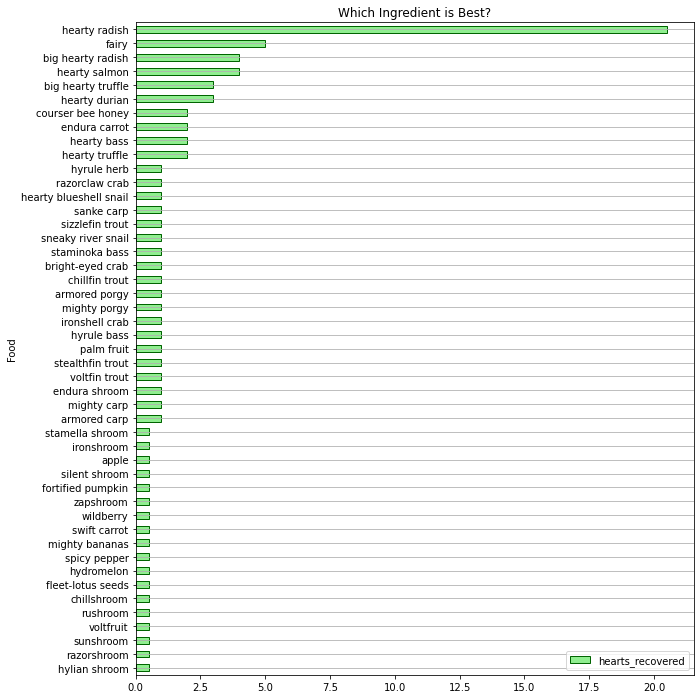

In [50]:
fig2, ax2 = plt.subplots()
hearts_df.plot(kind="barh", x="name", y ="hearts_recovered",figsize=(10,12), ax=ax2, edgecolor='darkgreen',color='lightgreen',
                  title="Which Ingredient is Best?",
                  xlabel="Food",
                  ylabel="Hearts Given");
ax2.yaxis.grid()
plt.savefig("../BotW/images/Ingredients.png")

## Cooked meals grant extra hearts and bonus effects

In [23]:
# Create DataFrame for cooking effects
cooking_df = pd.DataFrame(consumables_df)
# remove those that don't give a cooking effect
cooking_df

,name,hearts_recovered,cooking_effect
18,hearty radish,20.5,extra hearts
44,fairy,5.0,none
27,big hearty radish,4.0,extra hearts
49,hearty salmon,4.0,extra hearts
28,big hearty truffle,3.0,extra hearts
...,...,...,...
9,blue nightshade,0.0,stealth up
7,mighty thistle,0.0,attack up
6,warm safflina,0.0,cold resistance
2,swift violet,0.0,speed up


there are a total of 9 different types of consumales that give you extra hearts
this is good for survival and very beneficial for cooking!


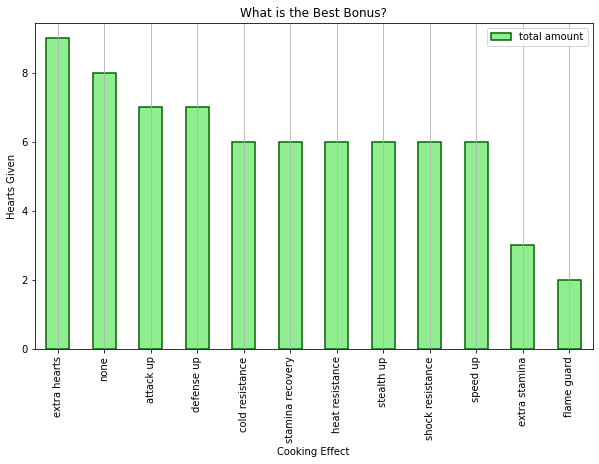

In [51]:
# Create a bar chart to capture the value counts of each cooking effect
fig4, ax4 = plt.subplots()
x = cooking_df['cooking_effect'].unique()
y = cooking_df['cooking_effect'].value_counts()
# create a new df to hold the value counts of each cooking effect
effect_count_df = pd.DataFrame({"cooking_effect":x, "total amount":y})
effect_count_df.plot(kind="bar",figsize=(10,6), ax=ax4, linewidth='1.5', edgecolor='darkgreen',color='lightgreen', 
                  title="What is the Best Bonus?",
                  xlabel="Cooking Effect",
                  ylabel="Hearts Given");
print(f"there are a total of {cooking_df['cooking_effect'].value_counts().max()} different types of consumales that give you extra hearts")
print("this is good for survival and very beneficial for cooking!")
ax4.xaxis.grid()
plt.savefig("../BotW/images/cooking_bonus.png")

In [52]:
#Call food data from second source
food_grid =("Food-Grid view.csv")
food_grid_df = pd.read_csv(food_grid)
#clear unecessary columns
Food_Grid_df=food_grid_df.drop(columns=['class', 'subclass', 'description', 'ingredients', 'effect']).dropna()
#Food_Grid_df

In [53]:
#Manipulate Data to suit our needs 
FoodGrid_df = Food_Grid_df[["hp", "name"]]
Food_Grid_df.reset_index(drop=True, inplace=True)
FoodGrid_df=FoodGrid_df.sort_values(by="hp", ascending=True)
FoodGrid_df=FoodGrid_df.set_index("name")
FoodGrid_df

,hp
name,
Roasted Armoranth,0.50
Roasted Acorn,0.50
Roasted Tree Nut,0.50
Roasted Mighty Thistle,0.50
Toasty Zapshroom,0.75
...,...
Seared Gourmet Steak,4.50
Roasted Whole Bird,4.50
Blueshell Escargot,4.50


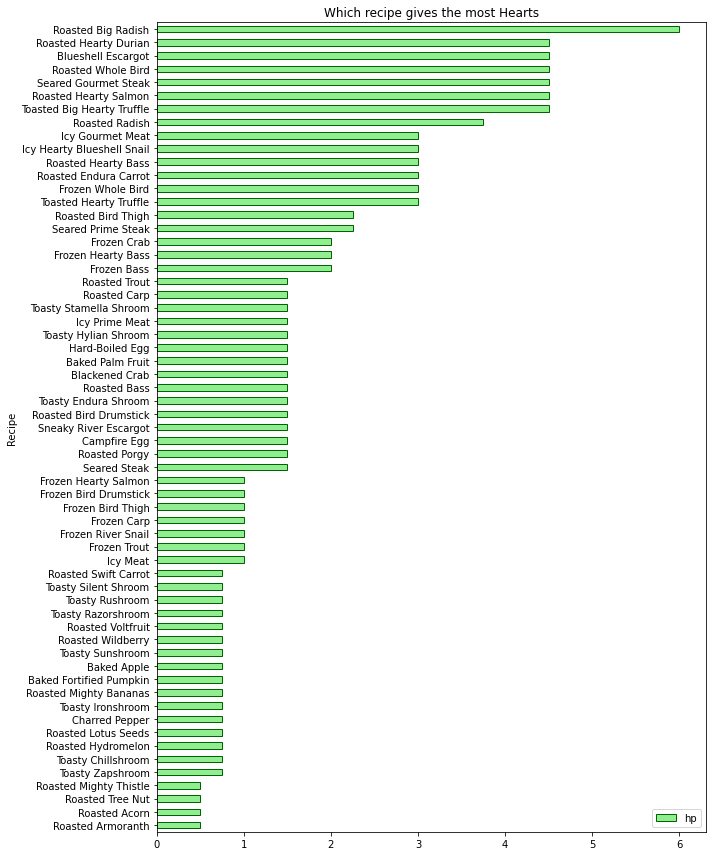

In [54]:
#Show info in graph form
fig, ax = plt.subplots()
FoodGrid_df.plot(kind="barh", figsize=(10,12), ax=ax, edgecolor='darkgreen',color='lightgreen',
                  title="Which recipe gives the most Hearts",
                  xlabel="Recipe",
                  ylabel="Hearts Gained");
fig.tight_layout();
plt.savefig("../BotW/images/Recipe_bar.png")

# Get monster list ID

In [55]:
# get foods and add to list
for i in monsters_json:
    # create a dictionary for monsters to create DataFrame)
    monster_dict = {
        "name": i['name'],
        "id": i['id'],
    }
    # add dictionary to list.
    monsters.append(monster_dict)

In [56]:
# Create DataFrame and save to .csv file
monsters_df = monsters_df = pd.DataFrame(monsters).sort_values(by="name")
monsters_df.to_csv("BotW_monster_list.csv", index=False)
monsters_df = monsters_df.set_index("id")
monsters_df

,name
id,
105,black bokoblin
105,black bokoblin
149,black hinox
149,black hinox
115,black lizalfos
...,...
162,windblight ganon
135,yiga blademaster
135,yiga blademaster


# Get drops ID


In [57]:
# Iterate through json and check if the value that I represents is an empty list
# If it is set the drops variable to None otherwise append the drop information and create a DF
drops = []
for i in monsters_json:
    if i['drops'] == []:
        i['drops'] = None
    else:
        drops_dict = {
        "drops": i['drops'],
        "id": i['id'],
        }
    drops.append(drops_dict)
drops_df = pd.DataFrame(drops)
# set the index of the dataframe to the id (will be handy when you split your entries next)
drops_df.set_index(drops_df['id'],inplace=True)
# split each item in  the df['drops'] and send it to a new row. Setting the index above allows us to 
# keep the index intact when we split them. 
drops_df = drops_df.explode('drops')
# Filter the dataframe to keep only the column that we need
drops_df[['drops']]

,drops
id,
94,octorok tentacle
94,octo balloon
94,octorok eyeball
108,moblin horn
108,moblin fang
...,...
96,purple rupee
96,silver rupee
92,octorok tentacle


In [58]:
drops_df.to_csv("BotW_drop.csv")

In [59]:
# create dataframe to hold drop counts
drops_count_df = pd.DataFrame(drops_df.index.value_counts())
# Renme id column to 'drop_counts'
drops_count_df = drops_count_df.rename(columns={"id":"drop_count"})

In [60]:
# rename index to 'id'
drops_count_df.index.name = "id"
drops_count_df

,drop_count
id,
148,12
147,10
107,9
112,9
120,9
...,...
150,1
146,1
137,1


In [61]:
# Merge drop_counts_df and mosnters_df to obtain total count of drops
# for a monster
calamity_df = pd.merge(monsters_df, drops_count_df, how="outer", on="id")
calamity_df = calamity_df.sort_values(by="drop_count", ascending=False)

In [62]:
# Save new DataFrame to csv file
calamity_df
calamity_df.to_csv("BotW_drop_counts.csv")

## Let's get into the game details

## how many defense weapons are there and which is the best one?

In [63]:
# Bring equipment table
equipment_df = equipment_df.fillna(0).sort_values(by="defense", ascending=False)
equipment_df

,name,attack,defense
13,hylian shield,0.0,90.0
77,royal guard's shield,0.0,70.0
8,ancient shield,0.0,70.0
62,savage lynel shield,0.0,62.0
97,royal shield,0.0,55.0
...,...,...,...
149,spiked moblin spear,9.0,0.0
55,scimitar of the seven,32.0,0.0
173,serpentine spear,12.0,0.0
156,shock arrow,0.0,0.0


In [64]:
# create Defense Df for barchart
# set variables to hols name and defense
equipment = equipment_df["name"]
#convert floats to ints
defense = equipment_df["defense"].astype(int)
defense_bar_df = pd.DataFrame({"Equipment":equipment, "Defense":defense})
defense_bar_df = defense_bar_df[defense_bar_df['Defense'] !=0]
defense_bar_df = defense_bar_df.set_index("Equipment")

the shiled with the best defense is the Hylian Shield with 90 defense


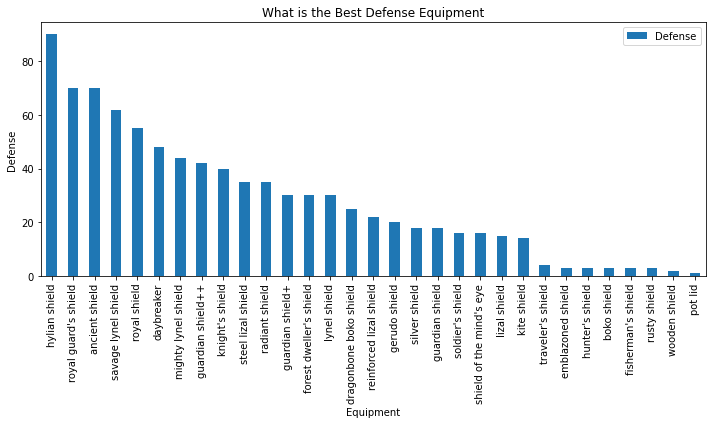

In [65]:
# plot bar chart from DataFrame
fig, ax = plt.subplots()
defense_bar_df.plot(kind="bar", figsize=(10,6), ax=ax, 
                  title="What is the Best Defense Equipment",
                  xlabel="Equipment",
                  ylabel="Defense");
fig.tight_layout();
plt.savefig("../BotW/images/defense_bar.png")
print(f"the shiled with the best defense is the Hylian Shield with {int(equipment_df['defense'].max())} defense")

## Let's armor up!

In [66]:
stuff = "Stuff-Grid view.csv"
stuff_file = pd.read_csv(stuff)
stuff_df = pd.DataFrame(stuff_file)
stuff_df.head()

,name,class,subclass,tags,durability,strength,range,arrows,defense,defense_upgrade_lvl1,...,description,selling_price,bonus_set,upgrade_1,upgrade_2,upgrade_3,upgrade_4,armor_upgrade,where_to_find,notes
0,Ancient Short Sword,Weapon,Light,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,The blade of this sword was made using an anci...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Blizzard Rod,Weapon,Light,NaN,32.0,10.0,NaN,NaN,NaN,NaN,...,A magical rod that can cast extreme cold in a ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Boko Club,Weapon,Light,NaN,8.0,4.0,NaN,NaN,NaN,NaN,...,A crude Bokoblin club made to clobber small pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bokoblin Arm,Weapon,Light,NaN,5.0,5.0,NaN,NaN,NaN,NaN,...,A skeletal arm that keeps moving even after it...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boomerang,Weapon,Light,NaN,18.0,8.0,NaN,NaN,NaN,NaN,...,This throwing weapon was originally used by th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Remove unecessary columns
stuff_df = stuff_df.drop(columns=["tags", "durability", "strength", "range",
                    "arrows", "description", "selling_price","where_to_find","upgrade_1","upgrade_2","upgrade_3", 
                    "upgrade_4","armor_upgrade",
                    "where_to_find","notes"])
# stuff_df

In [68]:
armor_df = pd.DataFrame(stuff_df.loc[stuff_df["class"] == "Armor", :])

In [69]:
# Fills NaN's with 0 and Nones
armor_df['defense_upgrade_lvl4'] = armor_df['defense_upgrade_lvl4'].fillna(0)
armor_df[['bonus','bonus_set']] = armor_df[['bonus','bonus_set']].fillna("None")
armor_df = armor_df.set_index(["name"])

# CREATE TABLE FOCUSIN ON BONUS SETS

In [70]:
bonus_set_df = pd.DataFrame(armor_df.reset_index())

In [71]:
bonus_set_df = bonus_set_df.drop(columns=["class","bonus"])

In [72]:
# bonus_set_df.set_index("bonus_set")
bonus_set_df = bonus_set_df.sort_values(by="bonus_set")

In [73]:
bonus_set_df = bonus_set_df.groupby("bonus_set").sum()
bonus_set_df = bonus_set_df.drop(index="None")

In [74]:
bonus_set_df = bonus_set_df.sort_values(by="defense_upgrade_lvl4", ascending=False)

In [75]:
bonus_set_df

,defense,defense_upgrade_lvl1,defense_upgrade_lvl2,defense_upgrade_lvl3,defense_upgrade_lvl4
bonus_set,,,,,
Master Sword Beam,57.0,96.0,156.0,234.0,384.0
Charge Attack Stamina,18.0,27.0,48.0,72.0,120.0
Ancient Proficiency,12.0,21.0,36.0,54.0,84.0
Climb Stamina,9.0,15.0,24.0,36.0,60.0
Disguise and Bone Attack,9.0,15.0,24.0,36.0,60.0
Fireproof,9.0,15.0,24.0,36.0,60.0
Shock Resist,9.0,15.0,24.0,36.0,60.0
Swim Dash Stamina,9.0,15.0,24.0,36.0,60.0
Unfreezable,9.0,15.0,24.0,36.0,60.0


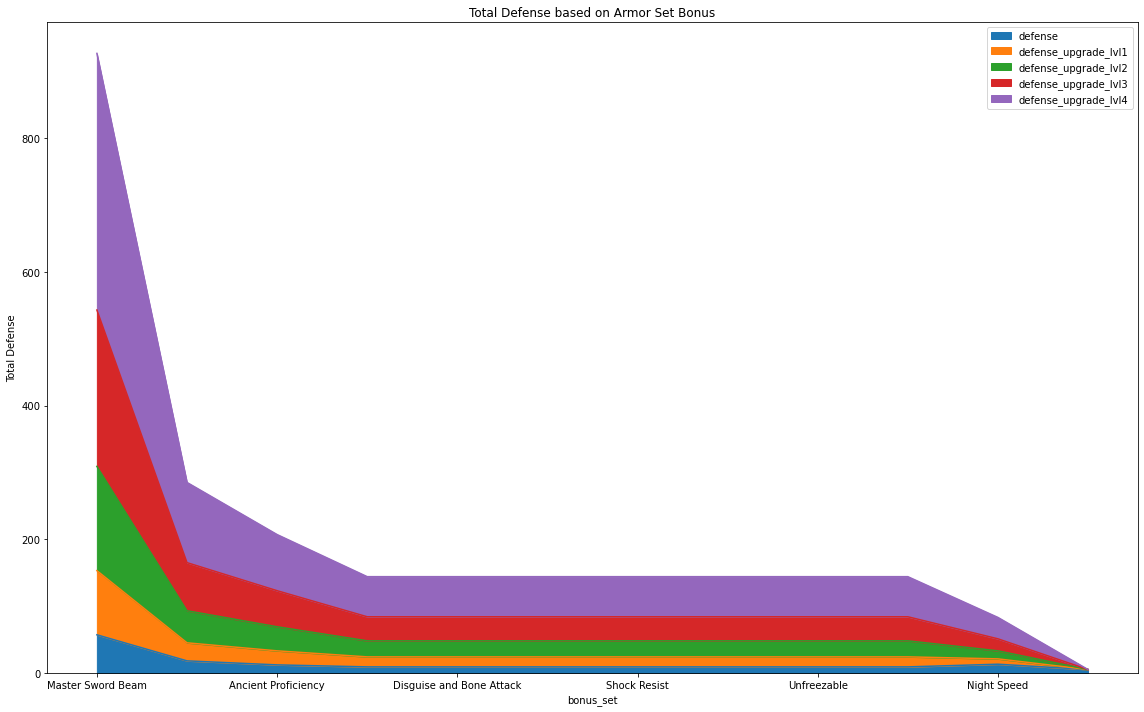

In [76]:
xticks= bonus_set_df.index.values
fig, ax =  plt.subplots()
bonus_set_df.plot(kind="area", ax=ax, figsize=(16,10));
ax.set(ylabel="Total Defense", title="Total Defense based on Armor Set Bonus");
fig.tight_layout();
plt.savefig("../BotW/images/armor_set_bonus.png")